In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen
import scipy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation,BatchNormalization
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
#Augmenting the training dataset
traingen = Imgen(
                rescale=1/255,
                validation_split=0.15,
                horizontal_flip=True
                #vertical_flip=True,
                
                 )
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255 
                rescale = 1/255
                )

In [3]:
trainds = traingen.flow_from_directory("D:\\Studiesss\\CAPSTONE PROJECT\\Sy Brain\\archive\\Training",
                                       target_size = (200,200),
                                       seed=123,
                                       batch_size  = 32,
                                       subset="training",
                                      )
valds = traingen.flow_from_directory("D:\\Studiesss\\CAPSTONE PROJECT\\Sy Brain\\archive\\Training",
                                     target_size = (200,200),
                                     seed=123,
                                     batch_size  = 32,
                                     subset="validation",
                                      )
testds = testgen.flow_from_directory("D:\\Studiesss\\CAPSTONE PROJECT\\Sy Brain\\archive\\Testing",
                                     target_size = (200,200),
                                     seed=123,
                                     batch_size  = 32
                                    ,
                                     shuffle=False)

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
print(len(trainds))
print(len(valds))
print(len(testds))


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

In [ ]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot    
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

In [ ]:
#Call the plotImages function
plotImages(x,y)

Model 1

In [21]:
model1 = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(200, 200, 3)),
    
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),


    Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),


     Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),




    
  


    
    

    Flatten(),


    
    
    Dense(16, activation='relu'),
    Dense(32,activation='relu'),

    
    Dense(4, activation='softmax')
])

In [ ]:
model1.summary()

In [22]:
model1.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [24]:
checkpoint = ModelCheckpoint("model1", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

hist1= model1.fit(trainds,validation_data= testds, epochs=10,callbacks=[checkpoint])

Epoch 1/10
77/77 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.8640
Epoch 1: val_accuracy improved from -inf to 0.46193, saving model to model1


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


77/77 [==============================] - 38s 496ms/step - loss: 0.3292 - accuracy: 0.8640 - val_loss: 3.5520 - val_accuracy: 0.4619
Epoch 2/10
77/77 [==============================] - ETA: 0s - loss: 0.2786 - accuracy: 0.8808
Epoch 2: val_accuracy did not improve from 0.46193
77/77 [==============================] - 36s 464ms/step - loss: 0.2786 - accuracy: 0.8808 - val_loss: 3.7523 - val_accuracy: 0.4619
Epoch 3/10
77/77 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.8865
Epoch 3: val_accuracy did not improve from 0.46193
77/77 [==============================] - 36s 463ms/step - loss: 0.2795 - accuracy: 0.8865 - val_loss: 4.5282 - val_accuracy: 0.4365
Epoch 4/10
77/77 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9025
Epoch 4: val_accuracy improved from 0.46193 to 0.48223, saving model to model1


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


77/77 [==============================] - 38s 495ms/step - loss: 0.2498 - accuracy: 0.9025 - val_loss: 4.8439 - val_accuracy: 0.4822
Epoch 5/10
77/77 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9054
Epoch 5: val_accuracy improved from 0.48223 to 0.51269, saving model to model1


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


77/77 [==============================] - 39s 501ms/step - loss: 0.2324 - accuracy: 0.9054 - val_loss: 4.5633 - val_accuracy: 0.5127
Epoch 6/10
77/77 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9156
Epoch 6: val_accuracy improved from 0.51269 to 0.55076, saving model to model1


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


77/77 [==============================] - 38s 494ms/step - loss: 0.2201 - accuracy: 0.9156 - val_loss: 4.7800 - val_accuracy: 0.5508
Epoch 7/10
77/77 [==============================] - ETA: 0s - loss: 0.2040 - accuracy: 0.9177
Epoch 7: val_accuracy improved from 0.55076 to 0.58122, saving model to model1


INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


77/77 [==============================] - 36s 467ms/step - loss: 0.2040 - accuracy: 0.9177 - val_loss: 5.2367 - val_accuracy: 0.5812
Epoch 8/10
77/77 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9312
Epoch 8: val_accuracy did not improve from 0.58122
77/77 [==============================] - 34s 437ms/step - loss: 0.1813 - accuracy: 0.9312 - val_loss: 4.9896 - val_accuracy: 0.5457
Epoch 9/10
77/77 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9259
Epoch 9: val_accuracy did not improve from 0.58122
77/77 [==============================] - 34s 435ms/step - loss: 0.1878 - accuracy: 0.9259 - val_loss: 5.2155 - val_accuracy: 0.5533
Epoch 10/10
77/77 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9287
Epoch 10: val_accuracy did not improve from 0.58122
77/77 [==============================] - 34s 434ms/step - loss: 0.1872 - accuracy: 0.9287 - val_loss: 5.4163 - val_accuracy: 0.5482


In [25]:
model1.evaluate(testds)

13/13 [==============================] - 2s 122ms/step - loss: 5.4163 - accuracy: 0.5482


[5.416299343109131, 0.5482233762741089]

In [ ]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False ## Not trainable weights



In [ ]:
base_model.summary()

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model2 = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:


model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


checkpoint2= ModelCheckpoint("model2", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early2= EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model2.fit(trainds,validation_data= valds, validation_steps=10,epochs=100,callbacks=[checkpoint2,early2])

In [ ]:
model2.evaluate(testds)

<Figure size 432x288 with 0 Axes>

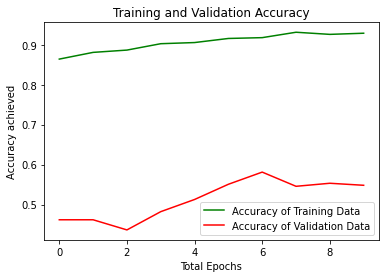

<Figure size 432x288 with 0 Axes>

In [26]:
epochs1= range(len(hist1.history['accuracy']))
epochs2=range(len(hist.history['accuracy']))
plt.plot(epochs1, hist1.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs1, hist1.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

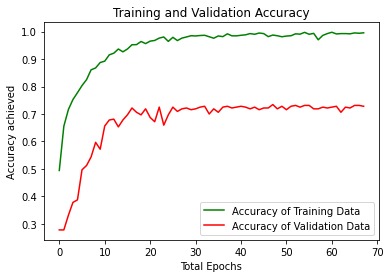

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs2, hist.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs2, hist.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1632\3126627542.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


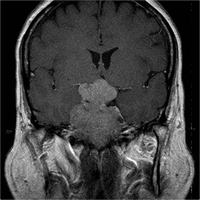

In [25]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 200, 200, 3), dtype=np.float32)
image = Image.open("D:\\Studiesss\\CAPSTONE PROJECT\\Sy Brain\\archive\\Testing\\pituitary_tumor\\image(5).jpg")
size = (200, 200)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [12]:
from keras.models import load_model
saved_model1 = load_model("model1")

from keras.models import load_model
saved_model2 = load_model("model2")

In [16]:
prediction = saved_model1.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 30ms/step
[[0.0000000e+00 3.3370419e-32 1.0000000e+00 0.0000000e+00]]
2


In [26]:
prediction =saved_model2.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 113ms/step
[[7.3607254e-09 9.9727494e-01 4.3463380e-05 2.6815447e-03]]
1
